## 使用python+numpy实现房价预测

In [13]:
## 预先导入一些第三方库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

**在创建环境的时候选择导入`波士顿房价预测`数据集，数据集位于`/home/data/data7802/boston_house_price.csv`，数据集部分展示如下：**

![](https://ai-studio-static-online.cdn.bcebos.com/d004d7ac78d440738da592d8695bb1e5c4efb9310d7e4ae483a502bf0cb53155)


In [14]:
## 读取数据集并展示一部分数据
house_price_data = pd.read_csv("data/data7802/boston_house_prices.csv", header=1)
print(house_price_data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


**其中前13项都是可能影响房价的一些因素，最后一列`MEDV`表示的就是房价**

In [15]:
## 创建一个神经网络模型
class GD(object):
    def __init__(self, x, y):
        # 数据集
        self.x = x
        self.y = y.reshape(-1, 1)
        # 默认学习率
        self.lr = 1e-3
        # 训练次数
        self.times = 500
        # 随机初始化参数，包括w和b
        self.theta = np.random.randn(self.x.shape[1] + 1, 1)
        # 在self.x后边加上一列值全为1的向量
        self.X = np.column_stack((self.x, np.ones([self.x.shape[0], 1])))
        # 保存误差
        self.losslist = []

    # 计算梯度
    def CalculateGradient(self):
        """
        计算当前梯度，并且返回
        X^T*(X*theta - y)
        """
        return np.matmul(self.X.T, np.matmul(self.X, self.theta) - self.y)

    def CalculateLoss(self):
        """
        计算每次迭代过程中的误差值,并且附加到self.losslist中
        :return: None
        """
        loss = 0.5 * np.sum(np.power(np.matmul(self.X, self.theta) - self.y, 2))
        self.losslist.append(loss)

    def GradientDeecent(self):
        """
        梯度下降，更新参数,并且返回参数
        :return: self.theta, self.b
        """
        for i in range(self.times):
            # 保存当前梯度信息
            g = self.CalculateGradient()
            # 计算误差
            self.CalculateLoss()
            # 更新参数
            self.theta = self.theta - self.lr * g
            print("训练轮次：{}，当前轮次误差：{}".format(i + 1, self.losslist[i]))

训练轮次：1，当前轮次误差：369.4522195174449
训练轮次：2，当前轮次误差：294.0763802843947
训练轮次：3，当前轮次误差：239.02458868469313
训练轮次：4，当前轮次误差：198.2767622681667
训练轮次：5，当前轮次误差：167.67214383390808
训练轮次：6，当前轮次误差：144.32284345317936
训练轮次：7，当前轮次误差：126.21441446342617
训练轮次：8，当前轮次误差：111.93346021155857
训练轮次：9，当前轮次误差：100.48157974215252
训练轮次：10，当前轮次误差：91.1480461365165
训练轮次：11，当前轮次误差：83.42247988789069
训练轮次：12，当前轮次误差：76.93479197381956
训练轮次：13，当前轮次误差：71.41374841715205
训练轮次：14，当前轮次误差：66.65827401973863
训练轮次：15，当前轮次误差：62.51749017826631
训练轮次：16，当前轮次误差：58.87675648761689
训练轮次：17，当前轮次误差：55.647852119909444
训练轮次：18，当前轮次误差：52.76202213045636
训练轮次：19，当前轮次误差：50.16501493263487
训练轮次：20，当前轮次误差：47.8135105658543
训练轮次：21，当前轮次误差：45.672525986161716
训练轮次：22，当前轮次误差：43.71351120293916
训练轮次：23，当前轮次误差：41.91293751009389
训练轮次：24，当前轮次误差：40.25123911011529
训练轮次：25，当前轮次误差：38.71201079709438
训练轮次：26，当前轮次误差：37.28139296108988
训练轮次：27，当前轮次误差：35.947595024098334
训练轮次：28，当前轮次误差：34.70052225863061
训练轮次：29，当前轮次误差：33.53148064400868
训练轮次：30，当前轮次误差：32.43294126140675
训练轮次：31，当前轮次

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


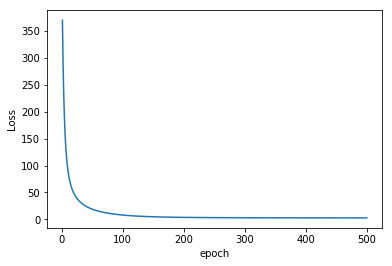

In [17]:
## 读取数据并训练
x = house_price_data.iloc[:, 0:13]
y = house_price_data.iloc[:, 13]
x_norm = ((x - x.min()) / (x.max() - x.min())).values
y_norm = ((y - y.min()) / (y.max() - y.min())).values
# 实例化
gd = GD(x_norm, y_norm)
gd.GradientDeecent()
y_pred = np.matmul(gd.X, gd.theta)
print(gd.theta)
plt.figure("Loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.plot([i + 1 for i in range(gd.times)], gd.losslist)
plt.show()

## 使用飞桨框架进行房价预测

In [18]:
## 导库
import paddle.fluid as fluid
import paddle
import numpy as np
import os
import matplotlib.pyplot as plt

In [19]:
BUF_SIZE=500
BATCH_SIZE=20


In [20]:
#用于训练的数据提供器，每次从缓存中随机读取批次大小的数据
train_reader = paddle.batch(
    paddle.reader.shuffle(paddle.dataset.uci_housing.train(), 
                          buf_size=BUF_SIZE),                    
    batch_size=BATCH_SIZE)   
#用于测试的数据提供器，每次从缓存中随机读取批次大小的数据
test_reader = paddle.batch(
    paddle.reader.shuffle(paddle.dataset.uci_housing.test(),
                          buf_size=BUF_SIZE),
    batch_size=BATCH_SIZE)  

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
API "paddle.dataset.uci_housing.train" is deprecated since 2.0.0, and will be removed in future versions. Please use "paddle.text.datasets.UCIHousing" instead.
reason: Please use new dataset API which supports paddle.io.DataLoader 
  This is separate from the ipykernel package so we can avoid doing imports until
Cache file /home/aistudio/.cache/paddle/dataset/uci_housing/housing.data not found, downloading http://paddlemodels.bj.bcebos.com/uci_housing/housing.data 
Begin to download
............
Download finished
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
API "paddle.dataset.uci_housing.test" is deprecated since 2.0.0, and will be removed in future versions. Please use "paddle.text.datasets.UCIHousing" instead.
reason: Please use new dataset API which supports paddle.io.DataLoader 
  


In [21]:

#用于打印，查看uci_housing数据
train_data=paddle.dataset.uci_housing.train();
sampledata=next(train_data())
print(sampledata)

(array([-0.0405441 ,  0.06636364, -0.32356227, -0.06916996, -0.03435197,
        0.05563625, -0.03475696,  0.02682186, -0.37171335, -0.21419304,
       -0.33569506,  0.10143217, -0.21172912]), array([24.]))


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
API "paddle.dataset.uci_housing.train" is deprecated since 2.0.0, and will be removed in future versions. Please use "paddle.text.datasets.UCIHousing" instead.
reason: Please use new dataset API which supports paddle.io.DataLoader 
  


In [23]:
paddle.enable_static()
#定义张量变量x，表示13维的特征值
x = fluid.layers.data(name='x', shape=[13], dtype='float32')
#定义张量y,表示目标值
y = fluid.layers.data(name='y', shape=[1], dtype='float32')
#定义一个简单的线性网络,连接输入和输出的全连接层
#input:输入tensor;
#size:该层输出单元的数目
#act:激活函数
y_predict=fluid.layers.fc(input=x,size=1,act=None)

In [24]:

cost = fluid.layers.square_error_cost(input=y_predict, label=y) #求一个batch的损失值
avg_cost = fluid.layers.mean(cost)                              #对损失值求平均值

In [25]:

optimizer = fluid.optimizer.SGDOptimizer(learning_rate=0.001)
opts = optimizer.minimize(avg_cost)

In [26]:

test_program = fluid.default_main_program().clone(for_test=True)

In [27]:
use_cuda = False                         #use_cuda为False,表示运算场所为CPU;use_cuda为True,表示运算场所为GPU           
place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace()
exe = fluid.Executor(place)              #创建一个Executor实例exe
exe.run(fluid.default_startup_program()) #Executor的run()方法执行startup_program(),进行参数初始化

[]

In [28]:
# 定义输入数据维度
feeder = fluid.DataFeeder(place=place, feed_list=[x, y])#feed_list:向模型输入的变量表或变量表名

In [29]:

iter=0;
iters=[]
train_costs=[]

def draw_train_process(iters,train_costs):
    title="training cost"
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=14)
    plt.ylabel("cost", fontsize=14)
    plt.plot(iters, train_costs,color='red',label='training cost') 
    plt.grid()
    plt.show()

Pass:0, Cost:592.36249
Test:0, Cost:145.44810
Pass:1, Cost:589.56329
Test:1, Cost:178.84985
Pass:2, Cost:570.84943
Test:2, Cost:168.94835
Pass:3, Cost:438.91205
Test:3, Cost:141.38052
Pass:4, Cost:505.20087
Test:4, Cost:88.85927
Pass:5, Cost:457.30194
Test:5, Cost:176.04980
Pass:6, Cost:258.72754
Test:6, Cost:151.16528
Pass:7, Cost:448.93439
Test:7, Cost:62.47404
Pass:8, Cost:333.64215
Test:8, Cost:16.51198
Pass:9, Cost:331.10992
Test:9, Cost:14.78093
Pass:10, Cost:444.56696
Test:10, Cost:74.18665
Pass:11, Cost:422.36493
Test:11, Cost:110.44833
Pass:12, Cost:285.92731
Test:12, Cost:21.81844
Pass:13, Cost:258.82297
Test:13, Cost:63.62513
Pass:14, Cost:387.42661
Test:14, Cost:60.32746
Pass:15, Cost:121.29138
Test:15, Cost:30.62586
Pass:16, Cost:177.93475
Test:16, Cost:76.13977
Pass:17, Cost:238.23148
Test:17, Cost:8.09512
Pass:18, Cost:245.80237
Test:18, Cost:79.30521
Pass:19, Cost:98.33235
Test:19, Cost:47.22866
Pass:20, Cost:48.12200
Test:20, Cost:50.03571
Pass:21, Cost:123.04604
Test:

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


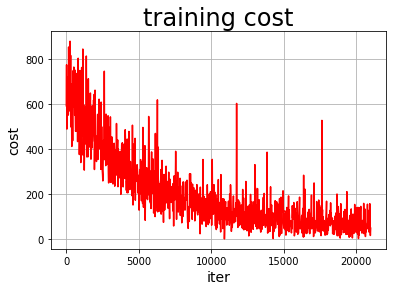

In [30]:
EPOCH_NUM=50
model_save_dir = "/home/aistudio/work/fit_a_line.inference.model"

for pass_id in range(EPOCH_NUM):                                  #训练EPOCH_NUM轮
    # 开始训练并输出最后一个batch的损失值
    train_cost = 0
    for batch_id, data in enumerate(train_reader()):              #遍历train_reader迭代器
        train_cost = exe.run(program=fluid.default_main_program(),#运行主程序
                             feed=feeder.feed(data),              #喂入一个batch的训练数据，根据feed_list和data提供的信息，将输入数据转成一种特殊的数据结构
                             fetch_list=[avg_cost])    
        if batch_id % 40 == 0:
            print("Pass:%d, Cost:%0.5f" % (pass_id, train_cost[0][0]))    #打印最后一个batch的损失值
        iter=iter+BATCH_SIZE
        iters.append(iter)
        train_costs.append(train_cost[0][0])
       
   
    # 开始测试并输出最后一个batch的损失值
    test_cost = 0
    for batch_id, data in enumerate(test_reader()):               #遍历test_reader迭代器
        test_cost= exe.run(program=test_program, #运行测试cheng
                            feed=feeder.feed(data),               #喂入一个batch的测试数据
                            fetch_list=[avg_cost])                #fetch均方误差
    print('Test:%d, Cost:%0.5f' % (pass_id, test_cost[0][0]))     #打印最后一个batch的损失值
    
    #保存模型
    # 如果保存路径不存在就创建
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)
print ('save models to %s' % (model_save_dir))
#保存训练参数到指定路径中，构建一个专门用预测的program
fluid.io.save_inference_model(model_save_dir,   #保存推理model的路径
                                  ['x'],            #推理（inference）需要 feed 的数据
                                  [y_predict],      #保存推理（inference）结果的 Variables
                                  exe)              #exe 保存 inference model
draw_train_process(iters,train_costs)

In [31]:
infer_exe = fluid.Executor(place)    #创建推测用的executor
inference_scope = fluid.core.Scope() #Scope指定作用域

In [32]:
infer_results=[]
groud_truths=[]

#绘制真实值和预测值对比图
def draw_infer_result(groud_truths,infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1,20) 
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results,color='green',label='training cost') 
    plt.grid()
    plt.show()

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
API "paddle.dataset.uci_housing.test" is deprecated since 2.0.0, and will be removed in future versions. Please use "paddle.text.datasets.UCIHousing" instead.
reason: Please use new dataset API which supports paddle.io.DataLoader 
  if __name__ == '__main__':
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


infer results: (House Price)
0: 14.19
1: 14.45
2: 13.88
3: 15.21
4: 14.31
5: 14.86
6: 14.57
7: 14.25
8: 12.43
9: 14.23
10: 12.10
11: 13.36
12: 13.89
13: 13.55
14: 13.69
15: 14.37
16: 15.16
17: 15.03
18: 15.32
19: 14.02
20: 14.60
21: 13.51
22: 15.06
23: 14.67
24: 14.43
25: 13.89
26: 14.84
27: 14.73
28: 15.54
29: 14.68
30: 14.53
31: 14.07
32: 14.16
33: 13.23
34: 12.97
35: 14.54
36: 14.67
37: 15.02
38: 15.14
39: 15.05
40: 14.05
41: 13.74
42: 14.94
43: 15.21
44: 15.12
45: 14.86
46: 14.34
47: 15.23
48: 15.32
49: 15.65
50: 14.24
51: 14.46
52: 14.04
53: 14.29
54: 15.23
55: 15.60
56: 15.21
57: 15.64
58: 15.78
59: 16.00
60: 16.26
61: 16.14
62: 14.41
63: 15.03
64: 15.77
65: 16.27
66: 15.88
67: 16.16
68: 16.28
69: 16.67
70: 15.07
71: 14.74
72: 15.54
73: 14.38
74: 15.36
75: 15.89
76: 16.80
77: 17.03
78: 17.19
79: 17.08
80: 16.67
81: 16.94
82: 16.03
83: 16.65
84: 16.64
85: 15.94
86: 15.31
87: 16.74
88: 17.39
89: 20.60
90: 20.78
91: 20.63
92: 19.48
93: 20.21
94: 20.47
95: 19.97
96: 20.11
97: 21.40
9

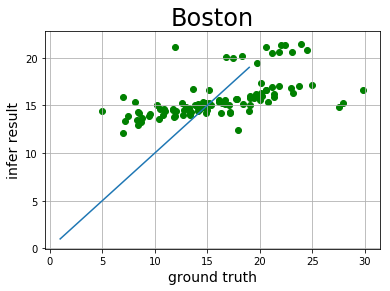

In [33]:
with fluid.scope_guard(inference_scope):#修改全局/默认作用域（scope）, 运行时中的所有变量都将分配给新的scope。
    #从指定目录中加载 推理model(inference model)
    [inference_program,                             #推理的program
     feed_target_names,                             #需要在推理program中提供数据的变量名称
     fetch_targets] = fluid.io.load_inference_model(#fetch_targets: 推断结果
                                    model_save_dir, #model_save_dir:模型训练路径 
                                    infer_exe)      #infer_exe: 预测用executor
    #获取预测数据
    infer_reader = paddle.batch(paddle.dataset.uci_housing.test(),  #获取uci_housing的测试数据
                          batch_size=200)                           #从测试数据中读取一个大小为200的batch数据
    #从test_reader中分割x
    test_data = next(infer_reader())
    test_x = np.array([data[0] for data in test_data]).astype("float32")
    test_y= np.array([data[1] for data in test_data]).astype("float32")
    results = infer_exe.run(inference_program,                              #预测模型
                            feed={feed_target_names[0]: np.array(test_x)},  #喂入要预测的x值
                            fetch_list=fetch_targets)                       #得到推测结果 
                            
    print("infer results: (House Price)")
    for idx, val in enumerate(results[0]):
        print("%d: %.2f" % (idx, val))
        infer_results.append(val)
    print("ground truth:")
    for idx, val in enumerate(test_y):
        print("%d: %.2f" % (idx, val))
        groud_truths.append(val)
    draw_infer_result(groud_truths,infer_results)